# Parts & Hardware List Generator

## _Counts and orders parts & hardware needed for a install/remove job_

Use this script for situations where you have a job where multiple stack-ups of hardware are required, and you would like an ordered Bill of Material (BOM), or Parts List, to know how many parts to order total.

E.g.: A complex example for a yatch gearbox.  See Parts List on the right.

![alt-text](image/Seawolf.jpg)



## Import libraries

In [45]:
import matplotlib as plt
%matplotlib inline

import pandas as pd

## Import parts and hardware stack-ups
Note: Kept a separate file for readability

In [74]:
#see this file for list of stack-ups
%run PartsandHardwareStackUps.ipynb

Parts & Hardware Stack-Up Dictionaries running...


Stack-ups successfully loaded



###### Individual stack-up check

In [75]:
# Parts List Hardware Generator
print("\nParts List Hardware Generator \n")

print("individual stack-up import check: \n")
for key,value in hardwareStackUpMixed1.items():
    print(key + ", " + str(value))
print("\n")

# establish master parts list
partsList = {}


Parts List Hardware Generator 

individual stack-up import check: 

bolt-A, 2
bushing-B, 4
washer-C, 4
nut-B, 1




## Function

In [76]:
# multiply the stackups by how many are in the install, and resave
print("compute the total hardware per stack-up occurance: \n")

def multiplyDict(hardwareStackUpDict,howManyHardwareStackUps):
    for hardware in hardwareStackUpDict:
        hardwareStackUpDict[hardware] = hardwareStackUpDict[hardware] * howManyHardwareStackUps

compute the total hardware per stack-up occurance: 



### Stack-up occurances?

In [77]:
#multiplyDict(stackUpName, quantity)     <---example
multiplyDict(parts,3)                 
multiplyDict(hardwareStackUpA,6) 
multiplyDict(hardwareStackUpB,4)                    
multiplyDict(hardwareStackUpC,19)    
multiplyDict(hardwareStackUpMixed1,10)       
multiplyDict(hardwareStackUpMixed2,4)  

###### Individual stack-up check

In [78]:
print("individual stack-up multiple occurance check: \n")
for key,value in hardwareStackUpMixed1.items():
    print(key + ", " + str(value))
print("\n")

individual stack-up multiple occurance check: 

bolt-A, 20
bushing-B, 40
washer-C, 40
nut-B, 10




## Generate full Parts List

In [79]:
# compile new dictionary parts list
print("compile the parts list from the stack-ups: ")
for stackUp in stackUps:
    for key,value in stackUp.items():
        if key in partsList:
            # if true, add to the current existing key
            partsList[key] += value
            ##print(str(value) + " added to the existing key: " + key)
        else:
            # if not true, create new key and initialize value
            partsList[key] = value
            ##print(str(value) + " added to the new key: " + key)
    #print(partsList)
print("\n")


# pretty print the parts list
def prettyPrintPartsList(masterPartsList):
    print("pretty print the parts list: ")
    #print(masterPartsList)

##    print('\n')
##    for key, value in masterPartsList.items():
##        print(key + "," + str(value))

    print('\n')
    sortedPartsList = sorted(partsList.items())
    for x in sortedPartsList:
       print(x)

    
prettyPrintPartsList(partsList)

compile the parts list from the stack-ups: 


pretty print the parts list: 


('bolt-A', 26)
('bolt-B', 4)
('bolt-C', 27)
('bracketA', 6)
('bracketB', 6)
('bushing-A', 22)
('bushing-B', 40)
('bushing-C', 57)
('motorA', 3)
('motorB', 3)
('newNamePlate', 3)
('nut-A', 6)
('nut-B', 18)
('nut-C', 19)
('washer-A', 58)
('washer-B', 4)
('washer-C', 78)


## Export to Excel File 

In [80]:
print(type(partsList))

<class 'dict'>


In [81]:
print(partsList)

{'motorA': 3, 'motorB': 3, 'bracketA': 6, 'bracketB': 6, 'newNamePlate': 3, 'bolt-A': 26, 'washer-A': 58, 'bushing-A': 22, 'nut-A': 6, 'bolt-B': 4, 'washer-B': 4, 'nut-B': 18, 'bolt-C': 27, 'washer-C': 78, 'bushing-C': 57, 'nut-C': 19, 'bushing-B': 40}


In [82]:
partsList = pd.Series(partsList)
partsList

bolt-A          26
bolt-B           4
bolt-C          27
bracketA         6
bracketB         6
bushing-A       22
bushing-B       40
bushing-C       57
motorA           3
motorB           3
newNamePlate     3
nut-A            6
nut-B           18
nut-C           19
washer-A        58
washer-B         4
washer-C        78
dtype: int64

In [83]:
writer = pd.ExcelWriter('Parts List.xlsx')
partsList.to_excel(writer, 'Sheet1')
writer.save()

## Visualization

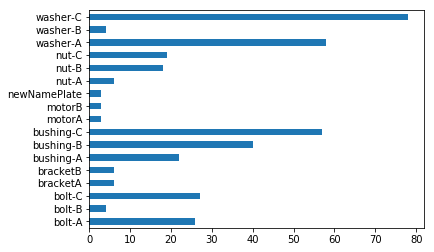

In [84]:
partsList.rename(index='part',columns={'gty'})
partsListFig = partsList.plot.barh()

In [85]:
partsList.sort_values(ascending=False)

washer-C        78
washer-A        58
bushing-C       57
bushing-B       40
bolt-C          27
bolt-A          26
bushing-A       22
nut-C           19
nut-B           18
nut-A            6
bracketB         6
bracketA         6
washer-B         4
bolt-B           4
newNamePlate     3
motorB           3
motorA           3
dtype: int64

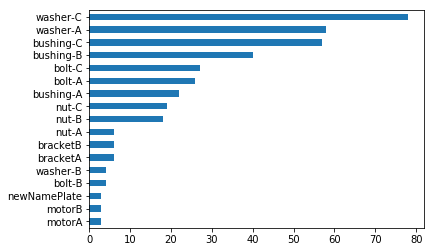

In [86]:
partsList.sort_values().plot.barh()